# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# **Load the dataset**

In [2]:
data = pd.read_csv("Student_Performance.csv")

In [3]:
data.shape

(10000, 6)

In [4]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91
1,4,82,No,4,2,65
2,8,51,Yes,7,2,45
3,5,52,Yes,5,2,36
4,7,75,No,8,5,66


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Hours Studied                     10000 non-null  int64 
 1   Previous Scores                   10000 non-null  int64 
 2   Extracurricular Activities        10000 non-null  object
 3   Sleep Hours                       10000 non-null  int64 
 4   Sample Question Papers Practiced  10000 non-null  int64 
 5   Performance Index                 10000 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 468.9+ KB


In [10]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [12]:
# Encode the categorical feature 'Extracurricular Activities'
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

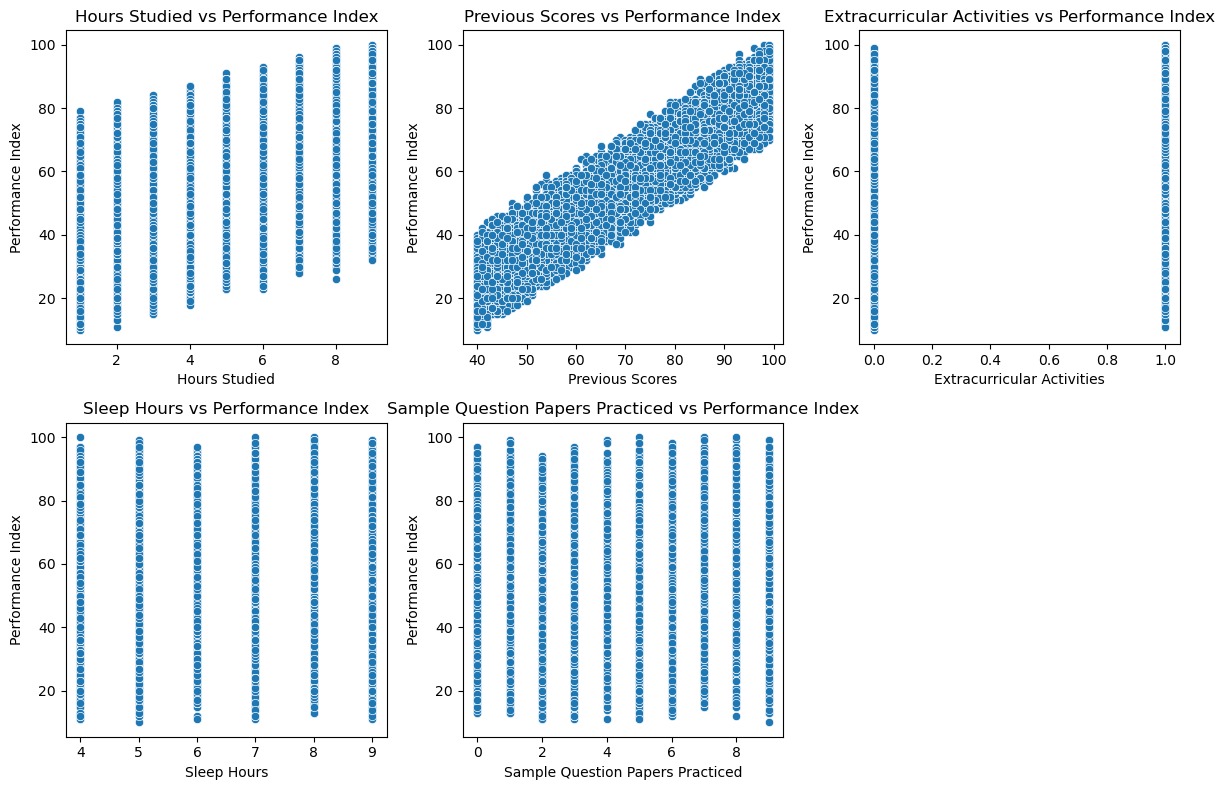

In [13]:
# Visualize relationships
plt.figure(figsize=(12, 8))
for i, col in enumerate(data.columns[:-1]):  # Exclude target variable
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=data[col], y=data['Performance Index'])
    plt.title(f'{col} vs Performance Index')
plt.tight_layout()
plt.show()

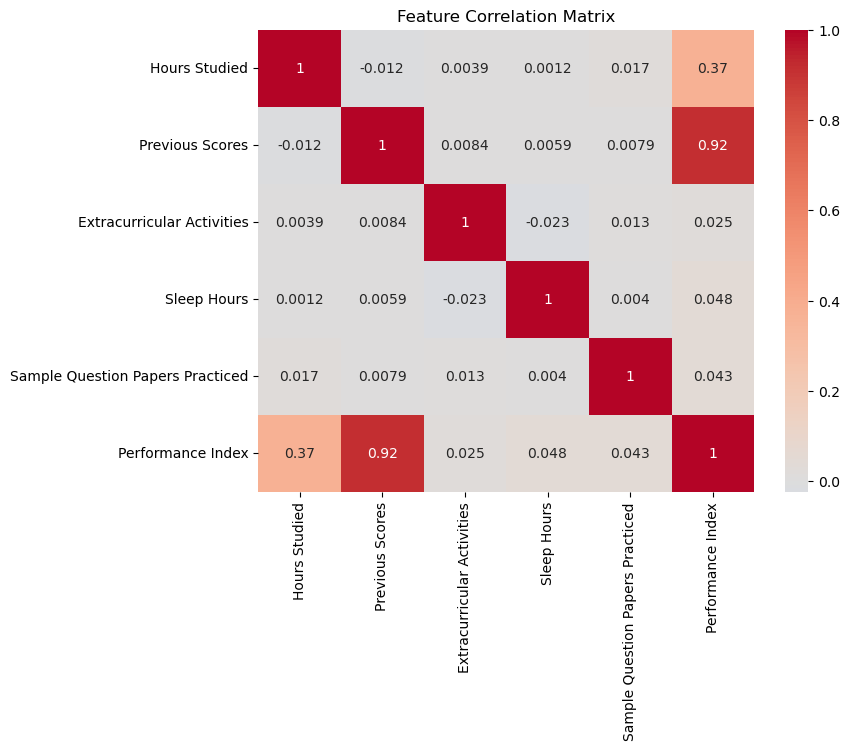

In [14]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

# **Separate Input and out features**

In [15]:
X = data.drop("Performance Index",axis=1)
y = data['Performance Index']

In [17]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [18]:
y

0       91
1       65
2       45
3       36
4       66
        ..
9995    23
9996    58
9997    74
9998    95
9999    64
Name: Performance Index, Length: 10000, dtype: int64

In [20]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split( X, y,  test_size=0.2,   random_state=42)

# **LinearRegression**

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([34.47064278, 25.69665091, 57.88131903, ..., 45.05542174,
       21.02145642, 22.57711635])

# **Make predictions**

In [24]:
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# **Evaluate the model**

In [25]:
print("Training Results:")
print(f"R-squared: {r2_score(y_train, train_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_train, train_predictions):.2f}")

Training Results:
R-squared: 0.99
MSE: 4.17


# **predictions on test**

In [26]:
print("\nTest Results:")
print(f"R-squared: {r2_score(y_test, test_predictions):.2f}")
print(f"MSE: {mean_squared_error(y_test, test_predictions):.2f}")

# 7. See some predictions
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': test_predictions,
    'Difference': abs(y_test - test_predictions)
})
print("\nSample predictions:")
print(results.head(10))


Test Results:
R-squared: 0.99
MSE: 4.08

Sample predictions:
      Actual  Predicted  Difference
6252      51  54.711854    3.711854
4684      20  22.615513    2.615513
1731      46  47.903145    1.903145
4742      28  31.289767    3.289767
4521      41  43.004570    2.004570
6340      59  59.071252    0.071252
576       48  45.903475    2.096525
5202      87  86.459118    0.540882
6363      37  37.700140    0.700140
439       73  72.055925    0.944075
